In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from nbodykit.lab import *
from nbodykit import setup_logging, style

import os
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

import numpy as np
import math
import statistics

In [3]:
setup_logging() # turn on logging to screen

In [4]:
# Set parameters
# Definition : k = 2pi n /LBox
NMesh = 1024
LBox = 1024.0
Npart = 1024*1024*1024
nfoldpow = -1024
print(Npart)
kNyq = np.pi * float(NMesh) / LBox
# If nfoldpow is > 0 :
#kmax = kNyq*np.power(2.0,nfoldpow-1)
# If nfoldpow is < 0 :
kmax = -nfoldpow * 2.0*np.pi / LBox
print(kNyq,kmax)

1073741824
(3.141592653589793, 6.283185307179586)


In [5]:
data_path_dir = '01/cosma/'

sim_name = "GR"

box_name = "box1"

snap_name = "01"
ext = ".dat"
model = "GR"

# Reading files
box_filename = "./"+sim_name+"/"+box_name+"/"+snap_name+"/cosma/GR-PM1024-Box1-01.dat"

inputFile1 = np.loadtxt(box_filename)

nval_1=inputFile1[:,0]
proughval_1=inputFile1[:,3]
wval_1=inputFile1[:,4]
kval_1=inputFile1[:,6]
ps_1=inputFile1[:,8]
nkval_1=kval_1.shape[0]
print(nkval_1)



psofk_1 = (proughval_1 - wval_1/Npart)*LBox*LBox*LBox
psofk_debiased_1 = (proughval_1)*LBox*LBox*LBox


print(kval_1,ps_1)

#for i in range(0,F4_nkval_1):
#    F4_psl0_stddev[i] = math.sqrt(F4_psl0_sqrsum[i]/(5-1))
#    F4_psl2_stddev[i] = math.sqrt(F4_psl2_sqrsum[i]/(5-1))
#    F4_psl4_stddev[i] = math.sqrt(F4_psl4_sqrsum[i]/(5-1))
#    F4_psl02_stddev[i] = math.sqrt(F4_psl02_sqrsum[i]/(5-1))


512
(array([6.13592315e-03, 1.22718463e-02, 1.84077695e-02, 2.45436926e-02,
       3.06796158e-02, 3.68155389e-02, 4.29514621e-02, 4.90873852e-02,
       5.52233084e-02, 6.13592315e-02, 6.74951547e-02, 7.36310778e-02,
       7.97670010e-02, 8.59029241e-02, 9.20388473e-02, 9.81747704e-02,
       1.04310694e-01, 1.10446617e-01, 1.16582540e-01, 1.22718463e-01,
       1.28854386e-01, 1.34990309e-01, 1.41126232e-01, 1.47262156e-01,
       1.53398079e-01, 1.59534002e-01, 1.65669925e-01, 1.71805848e-01,
       1.77941771e-01, 1.84077695e-01, 1.90213618e-01, 1.96349541e-01,
       2.02485464e-01, 2.08621387e-01, 2.14757310e-01, 2.20893233e-01,
       2.27029157e-01, 2.33165080e-01, 2.39301003e-01, 2.45436926e-01,
       2.51572849e-01, 2.57708772e-01, 2.63844696e-01, 2.69980619e-01,
       2.76116542e-01, 2.82252465e-01, 2.88388388e-01, 2.94524311e-01,
       3.00660234e-01, 3.06796158e-01, 3.12932081e-01, 3.19068004e-01,
       3.25203927e-01, 3.31339850e-01, 3.37475773e-01, 3.43611696e-01,
 

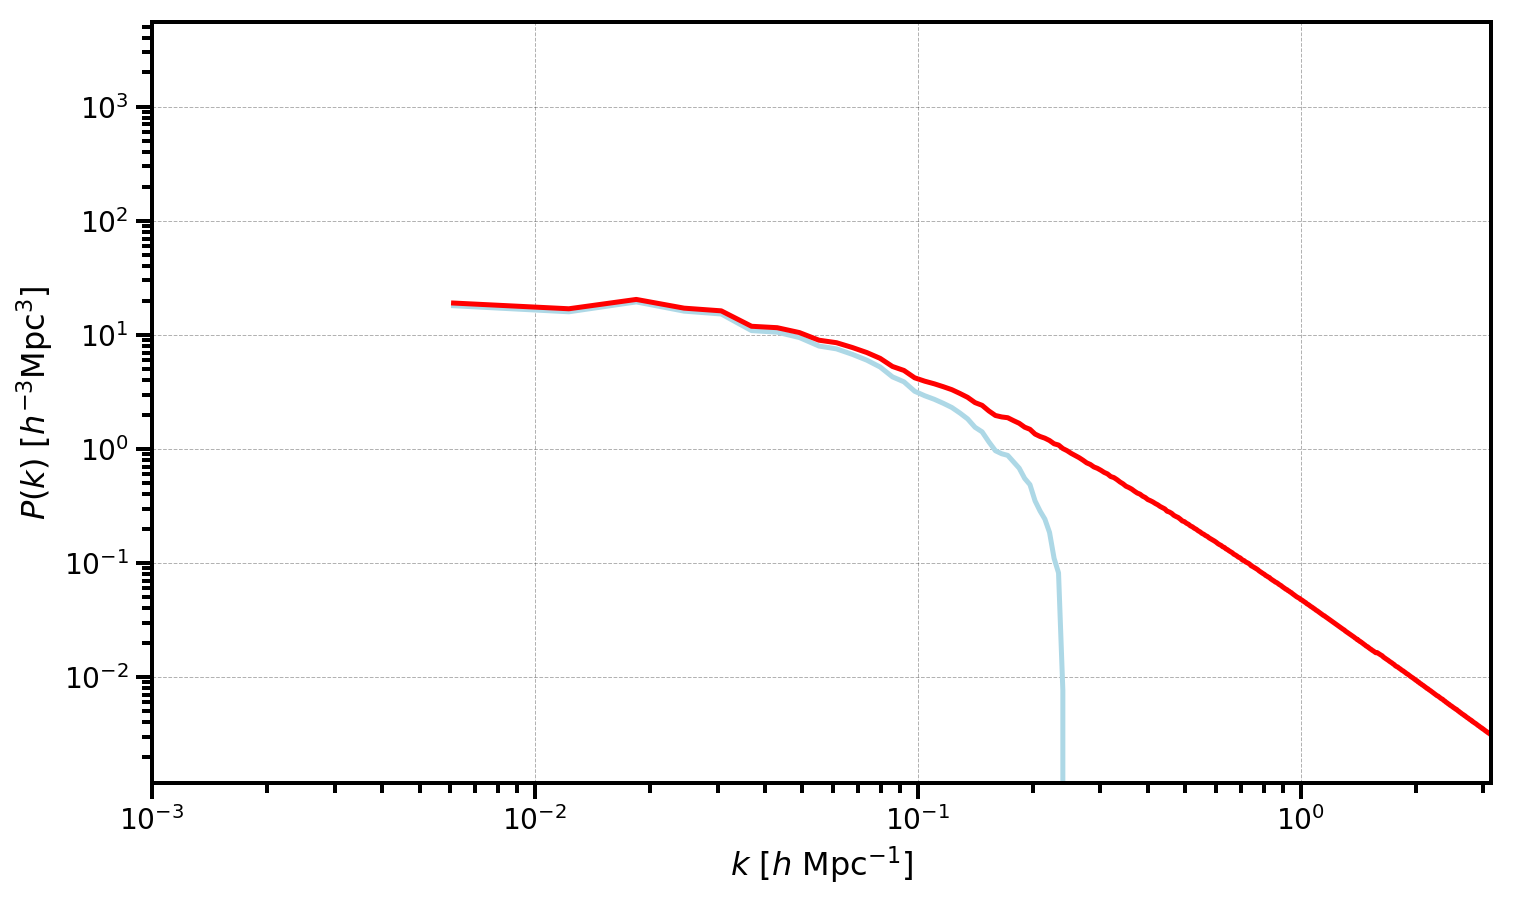

In [6]:
fig1 = plt.figure()

# print the shot noise subtracted P(k) :: activate!

plt.plot(kval_1, ps_1,color='lightblue')
plt.plot(kval_1, psofk_debiased_1,color='red')

#plt.plot(GR_kval_5, GR_psl0_down_rel,color='lightblue')
#plt.plot(F4_kval_5, F4_psl0_up_rel,color='orange')
#plt.plot(F4_kval_5, F4_psl0_down_rel,color='orange')

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
#plt.ylabel(r"$P_0(k)/P_0^{GR}$")

plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plt.xlim(0.005, 0.6)
plt.xlim(0.001, kNyq)
#plt.ylim(1,100000)
plt.xscale('log')
plt.yscale('log')

#pofk_rsd_pdf_name = 'pofk_rsd_'+sim_combined_name+'_l0'+'.pdf'

#fig1.savefig(pofk_rsd_pdf_name)